In [1]:
from itertools import combinations
import random
import matplotlib.pyplot as plt

In [2]:
data = {
    'stock_length': 5000,  # each stock item is 5000 units long
    'demand_lengths': [1200, 1500, 800, 1000],  # lengths required for each cut
    'demand_quantities': [10, 15, 8, 20],  # how many of each length is needed
}


In [3]:
# Generate feasible patterns
def generate_cut_patterns(data):
    stock_length = data['stock_length']
    demand_lengths = data['demand_lengths']
    feasible_patterns = []

    # Try different combinations of demand lengths
    for r in range(1, len(demand_lengths) + 1):
        for combo in combinations(demand_lengths, r):
            if sum(combo) <= stock_length:
                feasible_patterns.append(combo)
    
    return feasible_patterns

# Generate patterns based on our data
data['cut_patterns'] = generate_cut_patterns(data)
print("Feasible Cut Patterns:", data['cut_patterns'])


Feasible Cut Patterns: [(1200,), (1500,), (800,), (1000,), (1200, 1500), (1200, 800), (1200, 1000), (1500, 800), (1500, 1000), (800, 1000), (1200, 1500, 800), (1200, 1500, 1000), (1200, 800, 1000), (1500, 800, 1000), (1200, 1500, 800, 1000)]


In [4]:
def calculate_waste(pattern, stock_length):
    used_length = sum(pattern)
    waste = stock_length - used_length
    return waste if waste >= 0 else float('inf')  # Ensure no overuse

# Example usage
sample_pattern = data['cut_patterns'][0]  # Test with the first pattern
waste = calculate_waste(sample_pattern, data['stock_length'])
print(f"Pattern: {sample_pattern}, Waste: {waste}")




Pattern: (1200,), Waste: 3800


In [5]:
def initialize_population(pop_size, patterns):
    population = []
    for _ in range(pop_size):
        # Create a random solution by choosing random patterns
        solution = [random.choice(patterns) for _ in range(len(patterns))]
        population.append(solution)
    return population

# Initialize population
population = initialize_population(10, data['cut_patterns'])
print("Initial Population:", population)

def selection(population, stock_length):
    fitness_scores = [(solution, sum(calculate_waste(pattern, stock_length) for pattern in solution)) for solution in population]
    fitness_scores.sort(key=lambda x: x[1])  # Sort by total waste
    selected = [solution for solution, _ in fitness_scores[:len(fitness_scores) // 2]]
    return selected

# Select solutions with least waste
selected_population = selection(population, data['stock_length'])

def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

# Example crossover
parent1, parent2 = selected_population[0], selected_population[1]
child1, child2 = crossover(parent1, parent2)

def mutate(solution, patterns, mutation_rate=0.1):
    if random.random() < mutation_rate:
        idx = random.randint(0, len(solution) - 1)
        solution[idx] = random.choice(patterns)
    return solution

# Apply mutation
mutated_solution = mutate(child1, data['cut_patterns'])


Initial Population: [[(1000,), (1200, 1500, 1000), (1500, 800), (1000,), (1000,), (1500, 1000), (1200,), (1200, 800), (1500,), (1000,), (1200, 1500), (1200, 1500, 800), (1200, 800), (1200, 1500, 800), (1500, 1000)], [(1500, 800), (1200, 1500, 800, 1000), (1200, 1500, 800, 1000), (1200, 800), (1200, 1000), (1000,), (1200, 1500, 1000), (1200,), (800, 1000), (1200, 1500, 800), (1500, 800), (800,), (1200, 1500, 1000), (1200, 1500, 800, 1000), (1500, 800)], [(1200, 1500, 800), (800, 1000), (1200, 1000), (1500, 800), (1000,), (1200, 1000), (1200, 1500), (1200, 1500, 800), (1200, 800), (1500, 800, 1000), (1500, 800, 1000), (1200, 800, 1000), (1200, 800), (1200,), (1500, 800)], [(1500,), (1200, 1500), (1200, 1500), (800, 1000), (1200, 800), (1500,), (1500, 1000), (1200,), (1200, 800), (1000,), (1200, 1000), (1200, 800, 1000), (1500, 800), (1200, 1500), (1200, 1500, 800)], [(1200, 1500, 800, 1000), (1200, 1500, 800), (1200, 800), (1200, 1500), (1200, 1500, 800), (1500, 800, 1000), (1500, 1000),

In [6]:
def genetic_algorithm(data, pop_size=10, generations=50, mutation_rate=0.1):
    patterns = data['cut_patterns']
    stock_length = data['stock_length']
    
    # Initialize population
    population = initialize_population(pop_size, patterns)

    for _ in range(generations):
        # Selection
        selected = selection(population, stock_length)
        
        # Crossover and mutation
        next_generation = []
        while len(next_generation) < pop_size:
            parent1, parent2 = random.sample(selected, 2)
            child1, child2 = crossover(parent1, parent2)
            next_generation.extend([mutate(child1, patterns, mutation_rate), mutate(child2, patterns, mutation_rate)])
        
        population = next_generation  # Update population

    # Get the best solution in terms of minimal waste
    best_solution = min(population, key=lambda sol: sum(calculate_waste(p, stock_length) for p in sol))
    best_waste = sum(calculate_waste(p, stock_length) for p in best_solution)
    return best_solution, best_waste

# Run the GA
best_solution, best_waste = genetic_algorithm(data)
print("Best Solution:", best_solution)
print("Total Waste:", best_waste)


Best Solution: [(1200, 1500, 800, 1000), (1200, 1500, 800), (1500, 800, 1000), (1200, 1500, 1000), (1200, 1500, 800, 1000), (1200, 1500, 800, 1000), (1500, 800, 1000), (1200, 1500, 800, 1000), (1200, 1500, 800, 1000), (1500, 800, 1000), (1200, 1500, 800), (1200, 1500, 800), (1200, 1500, 800, 1000), (1500, 800, 1000), (1200, 1500, 800, 1000)]
Total Waste: 16100


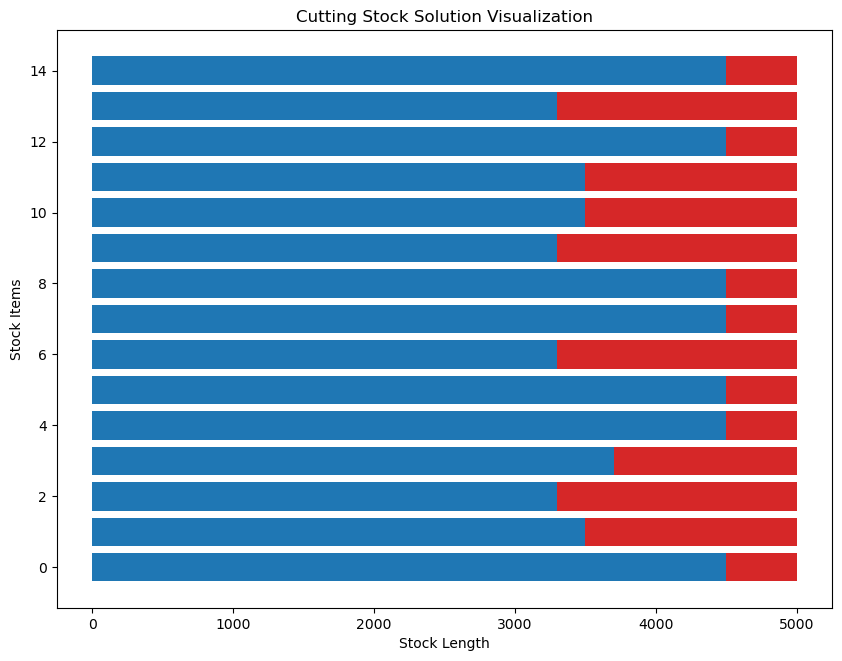

In [7]:

def visualize_cutting_solution(best_solution, stock_length):
    fig, ax = plt.subplots(figsize=(10, len(best_solution) * 0.5))
    
    for i, pattern in enumerate(best_solution):
        start = 0
        for cut in pattern:
            ax.broken_barh([(start, cut)], (i - 0.4, 0.8), facecolors='tab:blue')
            start += cut
        # Show remaining waste as a separate segment in red
        waste = stock_length - sum(pattern)
        if waste > 0:
            ax.broken_barh([(start, waste)], (i - 0.4, 0.8), facecolors='tab:red')
    
    ax.set_xlabel("Stock Length")
    ax.set_ylabel("Stock Items")
    ax.set_title("Cutting Stock Solution Visualization")
    plt.show()

# Visualize the best solution
visualize_cutting_solution(best_solution, data['stock_length'])


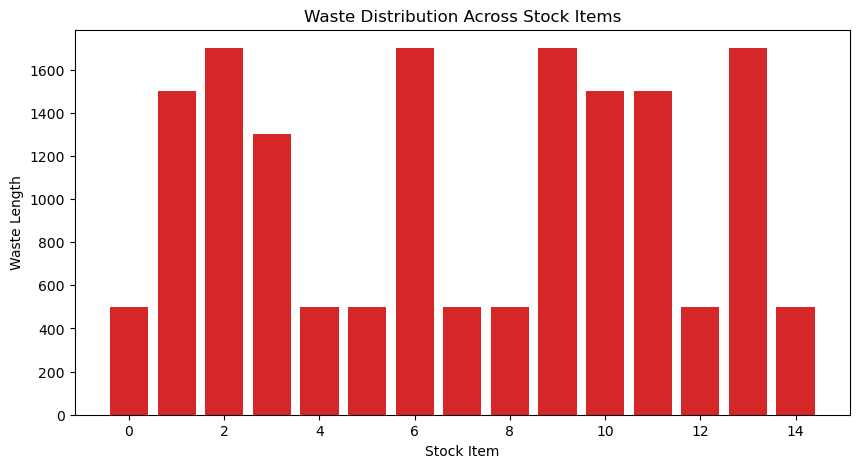

In [8]:
def visualize_waste_distribution(best_solution, stock_length):
    waste_per_item = [stock_length - sum(pattern) for pattern in best_solution]
    
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(waste_per_item)), waste_per_item, color='tab:red')
    plt.xlabel("Stock Item")
    plt.ylabel("Waste Length")
    plt.title("Waste Distribution Across Stock Items")
    plt.show()

# Visualize waste distribution
visualize_waste_distribution(best_solution, data['stock_length'])
